[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbyTab/boofun/blob/main/notebooks/lecture4_influences_effects.ipynb)

# Lecture 4: Influences & Effects

**Topics**: Influences, Effects, Poincaré Inequality, Edge-Isoperimetric Inequality

**O'Donnell Chapters**: 2.2-2.3  
**Based on lecture notes by: Patrick Bales**  
**Notebook by: Gabriel Taboada**

---

## Key Concepts

1. **Influence via Fourier**: $\text{Inf}_i[f] = \sum_{S \ni i} \hat{f}(S)^2$
2. **Total Influence**: $I[f] = \sum_S |S| \cdot \hat{f}(S)^2$
3. **Poincaré Inequality**: $\text{Var}[f] \leq I[f]$
4. **Edge-Isoperimetric**: Relating influences to boundary size

In [1]:
# Install/upgrade boofun (required for Colab)
# This ensures you have the latest version with all features
!pip install --upgrade boofun -q

import boofun as bf
print(f"BooFun version: {bf.__version__}")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/Users/gabrieltaboada/dev/Boofun/boofun/src/boofun/core/errormodels.py:21: UserWarning: uncertainties library not available - some error models disabled
  warnings.warn("uncertainties library not available - some error models disabled")


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


BooFun version: 1.1.1


/Users/gabrieltaboada/dev/Boofun/boofun/src/boofun/quantum/__init__.py:22: UserWarning: Qiskit not available - quantum features limited
  warnings.warn("Qiskit not available - quantum features limited")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import boofun as bf
from boofun.families import MajorityFamily, ParityFamily, GrowthTracker
from boofun.visualization import GrowthVisualizer, quick_growth_plot

np.random.seed(42)
plt.rcParams['figure.figsize'] = (12, 5)

## 1. The Poincaré Inequality

One of the most important inequalities in Boolean function analysis:

$$\text{Var}[f] \leq I[f]$$

where $\text{Var}[f] = \mathbb{E}[f^2] - \mathbb{E}[f]^2 = \sum_{S \neq \emptyset} \hat{f}(S)^2$

**Interpretation**: High variance requires high total influence.

In [3]:
# Verify Poincaré inequality for various functions
n = 5

functions = {
    "Majority": bf.majority(n),
    "Dictator": bf.dictator(n, 0),
    "Parity": bf.parity(n),
    "AND": bf.AND(n),
    "Tribes(2,4)": bf.tribes(2, 4),
}

print("Verifying Poincaré Inequality: Var[f] ≤ I[f]")
print("=" * 55)
print(f"{'Function':15} | {'Var[f]':>10} | {'I[f]':>10} | {'Slack':>10}")
print("-" * 55)

for name, f in functions.items():
    variance = f.variance()
    total_inf = f.total_influence()
    slack = total_inf - variance
    print(f"{name:15} | {variance:10.4f} | {total_inf:10.4f} | {slack:10.4f}")

Verifying Poincaré Inequality: Var[f] ≤ I[f]
Function        |     Var[f] |       I[f] |      Slack
-------------------------------------------------------
Majority        |     1.0000 |     1.8750 |     0.8750
Dictator        |     1.0000 |     1.0000 |     0.0000
Parity          |     1.0000 |     5.0000 |     4.0000
AND             |     0.1211 |     0.3125 |     0.1914
Tribes(2,4)     |     0.9844 |     1.5000 |     0.5156


## 2. Individual Influences and the KKL Theorem (Preview)

The **KKL Theorem** (Kahn-Kalai-Linial) says: For any balanced function,
$$\max_i \text{Inf}_i[f] \geq \Omega\left(\frac{\log n}{n}\right) \cdot \text{Var}[f]$$

This means: **No low-influence balanced function exists!**

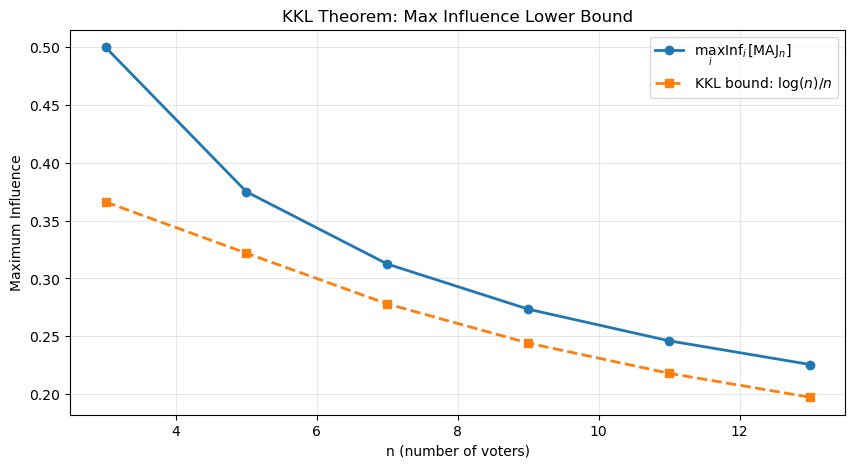

Key observation: Majority achieves near-optimal influence distribution!


In [4]:
# Verify KKL for Majority (the most "spread out" influence function)
ns = [3, 5, 7, 9, 11, 13]
max_influences = []
kkl_bounds = []

for n in ns:
    maj = bf.majority(n)
    # Direct method - much cleaner!
    max_inf = maj.max_influence()
    kkl_bound = np.log(n) / n  # Theoretical lower bound
    
    max_influences.append(max_inf)
    kkl_bounds.append(kkl_bound)

plt.figure(figsize=(10, 5))
plt.plot(ns, max_influences, 'o-', label=r'$\max_i \text{Inf}_i[\text{MAJ}_n]$', linewidth=2)
plt.plot(ns, kkl_bounds, 's--', label=r'KKL bound: $\log(n)/n$', linewidth=2)
plt.xlabel('n (number of voters)')
plt.ylabel('Maximum Influence')
plt.title('KKL Theorem: Max Influence Lower Bound')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Key observation: Majority achieves near-optimal influence distribution!")

## 3. Asymptotic Behavior: Growth Tracking

The `boofun` library provides **function families** and **growth tracking** to study
how properties change as the number of variables increases.


Asymptotic result: I[MAJ_n] ∼ √(2n/π)
  - Total influence grows like √n for Majority
  - This is optimal for balanced symmetric functions (KKL)



quick_growth_plot() provides instant asymptotic visualization!


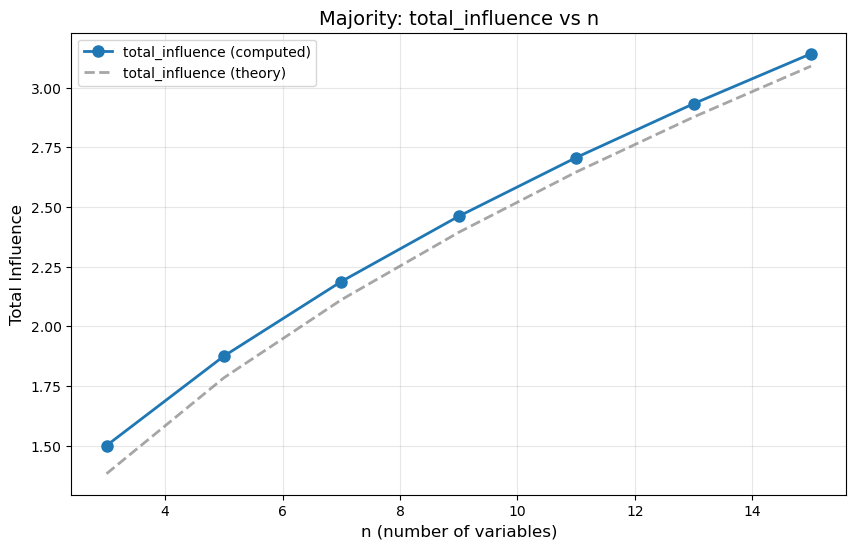

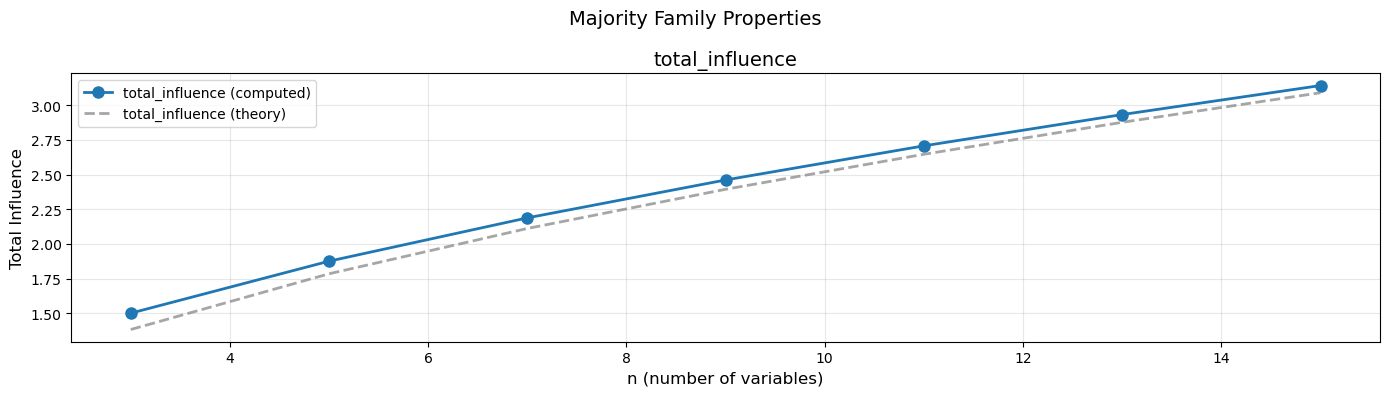

In [5]:
# Track how total influence grows with n
maj_family = MajorityFamily()
tracker = GrowthTracker(maj_family)

# Track total influence
tracker.mark("total_influence")

# Observe for different n values (odd only for Majority)
tracker.observe(n_values=[3, 5, 7, 9, 11, 13, 15])

# Visualize using the GrowthVisualizer
viz = GrowthVisualizer()
fig, ax = viz.plot_growth(tracker, "total_influence", show_theory=True)

print("\nAsymptotic result: I[MAJ_n] ∼ √(2n/π)")
print("  - Total influence grows like √n for Majority")
print("  - This is optimal for balanced symmetric functions (KKL)")

# Quick comparison: Multiple families at once
fig = quick_growth_plot("majority", properties=["total_influence"])
print("\nquick_growth_plot() provides instant asymptotic visualization!")


Family comparison reveals different growth rates:
  - Parity: I[f] = n (all variables equally influential)
  - AND/OR: I[f] ≈ 1 - 1/2^{n-1} (only one variable matters most)
  - Majority: I[f] ∼ √n (balanced influence)


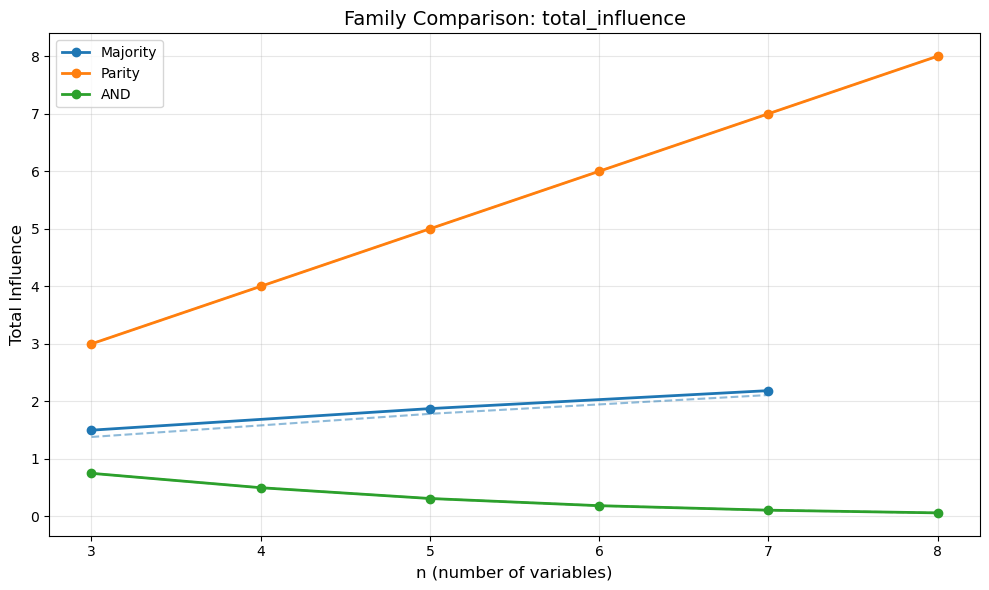

In [6]:
# Compare multiple function families
from boofun.families import ANDFamily, ORFamily, TribesFamily

families = {
    "Majority": GrowthTracker(MajorityFamily()),
    "Parity": GrowthTracker(ParityFamily()),
    "AND": GrowthTracker(ANDFamily()),
}

# Track total influence for all families
n_vals = [3, 4, 5, 6, 7, 8]
for name, tracker in families.items():
    tracker.mark("total_influence")
    try:
        tracker.observe(n_values=n_vals)
    except:
        pass  # Some families have constraints on valid n

# Compare using GrowthVisualizer
viz = GrowthVisualizer()
fig = viz.plot_family_comparison(families, "total_influence", figsize=(10, 6))

print("\nFamily comparison reveals different growth rates:")
print("  - Parity: I[f] = n (all variables equally influential)")
print("  - AND/OR: I[f] ≈ 1 - 1/2^{n-1} (only one variable matters most)")
print("  - Majority: I[f] ∼ √n (balanced influence)")

## Summary

### Key Takeaways

1. **Poincaré Inequality**: $\text{Var}[f] \leq I[f]$ - high variance needs high influence

2. **KKL Theorem**: $\max_i \text{Inf}_i[f] \geq \Omega(\log n / n)$ for balanced functions

3. **Majority is optimal**: Achieves the lowest max-influence among symmetric balanced functions

### boofun Usage (NEW Simplified API!)
```python
# Direct methods on BooleanFunction - no SpectralAnalyzer needed!
f = bf.majority(5)

f.variance()        # Var[f]
f.influences()      # All influences
f.total_influence() # I[f] = sum of influences  
f.max_influence()   # max_i Inf_i[f]
f.analyze()         # Quick summary of common metrics
```